## Regression Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset 
wasabi_data = pd.read_csv("Wasabi_data_themes_genre_mft_updated.csv", low_memory=False) 

In [4]:
wasabi_data.artist_gender.value_counts()

artist_gender
Male      275074
Female     79222
Mix        23516
Name: count, dtype: int64

In [5]:
artist_gender_encoded = pd.get_dummies(wasabi_data['artist_gender'], prefix='gender').astype(int)
wasabi_data= pd.concat([wasabi_data, artist_gender_encoded], axis=1)

In [6]:
wasabi_data.head(3)

,song_id,song_title,artist_id,artist_name,song_pubdate_combined,song_year_combined,song_decade_combined,other_artist_info,lyrics,album_genre,genre,cover_of,is_cover,SongID,chart_positions,first_week_in_chart,is_billboard,dbp_genre,genre_combined_reduced,genre_combined_reduced_from,care_lines,care_scores,harm_lines,harm_scores,fairness_lines,fairness_scores,cheating_lines,cheating_scores,loyalty_lines,loyalty_scores,betrayal_lines,betrayal_scores,authority_lines,authority_scores,subversion_lines,subversion_scores,purity_lines,purity_scores,degradation_lines,degradation_scores,artist_gender,artist_type,n_males,n_females,is_care,is_harm,is_fairness,is_cheating,is_loyalty,is_betrayal,is_authority,is_subversion,is_purity,is_degradation,lemmas,dominant_topic,topic_contrib,keywords,Love and Emotions,Movement and Change,Passion and Desire,Profanity and Aggression,Spiritual and Dreamy,Violence and Darkness,id,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,purity,degradation,fairness_old,loyalty_old,mapped_genres,Classical,Country and Folk,Electronic,Experimental,Jazz and Blues,Latin,Metal,Other,Pop,Punk,R&b and Soul/Funk,Rap/Hip Hop,Religious,Rock,processed_lyrics,neg,neu,pos,compound,cleaned_lyrics,trust,fear,negative,sadness,anger,surprise,positive,disgust,joy,anticipation,valence,arousal,dominance,lyrics_similarity_score_distilbert,nrc_valence,nrc_arousal,nrc_dominance,gender_Female,gender_Male,gender_Mix
0,5714dec325ac0d8aee38218d,Who Will Buy?,56d7eac926a8a3040c6869cb,Aaron Neville,1972-04-01,1972,1970,"{'n_albums': 21, 'n_songs': 303, 'languages': ...",Who will buy this wonderful morning?\nSuch a s...,R&amp;B,NaN,5714ded925ac0d8aee48cb53,True,NaN,NaN,NaN,False,"['Rhythm and blues', 'Country music', 'Pop mus...",['R&B and soul'],album,[],0.028289,[],0.000782,[],0.000879,[],0.010678,[],0.010880,[],0.013155,[],0.008693,[],0.007454,[],0.018698,[],0.009182,Male,Person,NaN,NaN,False,False,False,False,False,False,False,False,False,False,"['buy', 'wonderful', 'morning', 'sky', 'never'...",Spiritual and Dreamy,0.3078,"world, light, come, eye, see, life, night, fal...",0,0,0,0,1,0,0,0.126650,0.066806,0.453812,0.048531,0.240807,0.096316,0.183997,0.171149,0.077081,0.141319,0.044153,0.019708,"Country and Folk,Jazz and Blues",0,1,0,0,1,0,0,0,0,0,0,0,0,0,who will buy this wonderful morning such a sky...,0.044,0.793,0.164,0.9784,who will buy this wonderful morning such a sky...,6,2,4,3,4,6,9,2,7,8,82.501890,56.865709,63.744016,0.729606,0.679164,0.460164,0.546433,0,1,0
1,5714dec425ac0d8aee38a05f,"Love Theme From ""Pictures Of The Sea""",56d7f0a156847be81b3e8e57,Al Di Meola,1976-01-01,1976,1970,"{'n_albums': 8, 'n_songs': 75, 'languages': {'...","Can't you see the sun, can't you see it glow?\...",Jazz Fusion,NaN,NaN,False,NaN,NaN,NaN,False,"['Latin jazz', 'Jazz fusion', 'World music']",['Jazz'],album,[],0.038367,[],0.001140,[],0.001004,[],0.006551,[],0.005154,[],0.022322,[],0.008402,[],0.011231,[],0.017922,[],0.034833,Male,Person,NaN,NaN,False,False,False,False,False,False,False,False,False,False,"['see', 'sun', 'see', 'glow', 'see', 'rain', '...",Spiritual and Dreamy,0.7440,"world, light, come, eye, see, life, night, fal...",0,0,0,0,1,0,1,0.056615,0.095776,0.221709,0.030340,0.125543,0.101013,0.239106,0.278636,0.057048,0.225947,0.051617,0.020164,"Jazz and Blues,Latin",0,0,0,0,1,1,0,0,0,0,0,0,0,0,cant you see the sun cant you see it glow cant...,0.000,0.942,0.058,0.7319,cant you see the sun cant you see it glow cant...,3,0,0,0,0,1,4,0,3,3,77.456538,52.569917,64.777022,0.879289,0.728273,0.406045,0.510864,0,1,0
2,5714dec425ac0d8aee38a0f0,I Can't Get Next To You,56d7f0a856847be81b3e8e5e,Al Green,1971-08-14,1971,1970,"{'n_albums': 36, 'n_songs': 368, 'languages': ...",I ...(my my my my)\nI can turn a gray sky blue...,NaN,NaN,NaN,False,I Can't Get Next To YouAl Green,"[98, 89, 95, 69, 77, 60, 64, 71, 71, 79]",11/21/1970,True,"['Soul music', 'Rhythm and blues', 'Smooth sou...","['R&B and soul', 'Blues']",artist,"[[0.5390999913, ""I've 

In [7]:
columns_to_remove = ['Classical', 'Country and Folk', 'Electronic', 'Experimental',
       'Jazz and Blues', 'Latin', 'Metal', 'Other', 'Pop', 'Punk',
       'R&b and Soul/Funk', 'Rap/Hip Hop', 'Religious', 'Rock']

# Drop the columns
wasabi_data = wasabi_data.drop(columns=columns_to_remove, errors='ignore')  # errors='ignore' skips any columns not found
wasabi_data.head(2)

,song_id,song_title,artist_id,artist_name,song_pubdate_combined,song_year_combined,song_decade_combined,other_artist_info,lyrics,album_genre,genre,cover_of,is_cover,SongID,chart_positions,first_week_in_chart,is_billboard,dbp_genre,genre_combined_reduced,genre_combined_reduced_from,care_lines,care_scores,harm_lines,harm_scores,fairness_lines,fairness_scores,cheating_lines,cheating_scores,loyalty_lines,loyalty_scores,betrayal_lines,betrayal_scores,authority_lines,authority_scores,subversion_lines,subversion_scores,purity_lines,purity_scores,degradation_lines,degradation_scores,artist_gender,artist_type,n_males,n_females,is_care,is_harm,is_fairness,is_cheating,is_loyalty,is_betrayal,is_authority,is_subversion,is_purity,is_degradation,lemmas,dominant_topic,topic_contrib,keywords,Love and Emotions,Movement and Change,Passion and Desire,Profanity and Aggression,Spiritual and Dreamy,Violence and Darkness,id,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,purity,degradation,fairness_old,loyalty_old,mapped_genres,processed_lyrics,neg,neu,pos,compound,cleaned_lyrics,trust,fear,negative,sadness,anger,surprise,positive,disgust,joy,anticipation,valence,arousal,dominance,lyrics_similarity_score_distilbert,nrc_valence,nrc_arousal,nrc_dominance,gender_Female,gender_Male,gender_Mix
0,5714dec325ac0d8aee38218d,Who Will Buy?,56d7eac926a8a3040c6869cb,Aaron Neville,1972-04-01,1972,1970,"{'n_albums': 21, 'n_songs': 303, 'languages': ...",Who will buy this wonderful morning?\nSuch a s...,R&amp;B,NaN,5714ded925ac0d8aee48cb53,True,NaN,NaN,NaN,False,"['Rhythm and blues', 'Country music', 'Pop mus...",['R&B and soul'],album,[],0.028289,[],0.000782,[],0.000879,[],0.010678,[],0.010880,[],0.013155,[],0.008693,[],0.007454,[],0.018698,[],0.009182,Male,Person,NaN,NaN,False,False,False,False,False,False,False,False,False,False,"['buy', 'wonderful', 'morning', 'sky', 'never'...",Spiritual and Dreamy,0.3078,"world, light, come, eye, see, life, night, fal...",0,0,0,0,1,0,0,0.126650,0.066806,0.453812,0.048531,0.240807,0.096316,0.183997,0.171149,0.077081,0.141319,0.044153,0.019708,"Country and Folk,Jazz and Blues",who will buy this wonderful morning such a sky...,0.044,0.793,0.164,0.9784,who will buy this wonderful morning such a sky...,6,2,4,3,4,6,9,2,7,8,82.501890,56.865709,63.744016,0.729606,0.679164,0.460164,0.546433,0,1,0
1,5714dec425ac0d8aee38a05f,"Love Theme From ""Pictures Of The Sea""",56d7f0a156847be81b3e8e57,Al Di Meola,1976-01-01,1976,1970,"{'n_albums': 8, 'n_songs': 75, 'languages': {'...","Can't you see the sun, can't you see it glow?\...",Jazz Fusion,NaN,NaN,False,NaN,NaN,NaN,False,"['Latin jazz', 'Jazz fusion', 'World music']",['Jazz'],album,[],0.038367,[],0.001140,[],0.001004,[],0.006551,[],0.005154,[],0.022322,[],0.008402,[],0.011231,[],0.017922,[],0.034833,Male,Person,NaN,NaN,False,False,False,False,False,False,False,False,False,False,"['see', 'sun', 'see', 'glow', 'see', 'rain', '...",Spiritual and Dreamy,0.7440,"world, light, come, eye, see, life, night, fal...",0,0,0,0,1,0,1,0.056615,0.095776,0.221709,0.030340,0.125543,0.101013,0.239106,0.278636,0.057048,0.225947,0.051617,0.020164,"Jazz and Blues,Latin",cant you see the sun cant you see it glow cant...,0.000,0.942,0.058,0.7319,cant you see the sun cant you see it glow cant...,3,0,0,0,0,1,4,0,3,3,77.456538,52.569917,64.777022,0.879289,0.728273,0.406045,0.510864,0,1,0


### Genres For the regression model:

In [8]:
# Updated super-genre categories based on MusicMap's 22 main genres
# We'll consolidate the subgenres under these super-genres while preserving the fine granularity
import ast
import re

musicmap_genres = {
    'Rock': ['rock', 'alternative rock', 'hard rock', 'rockabilly', 'garage rock', 'psychedelic rock', 'progressive rock', 'grunge', 'surf rock', 'southern rock'],
    'Pop': ['pop', 'synthpop', 'dream pop', 'electropop', 'indie pop', 'chamber pop', 'art pop', 'dance pop', 'teen pop'],
    'Jazz': ['jazz', 'bebop', 'swing', 'cool jazz', 'free jazz', 'smooth jazz', 'fusion'],
    'Blues': ['blues', 'delta blues', 'chicago blues'],
    'Soul/Funk': ['soul', 'funk', 'neo soul', 'motown', 'doo-wop'],
    'Hip-Hop': ['hip hop', 'hip-hop', 'rap', 'trap', 'boom bap', 'gangsta rap', 'conscious rap'],
    'Electronic': ['electronic', 'edm', 'electro', 'idm', 'synthwave'],
    'Reggae': ['reggae', 'dub', 'ska', 'rocksteady'],
    'Latin': ['latin', 'cumbia', 'salsa', 'merengue', 'bachata', 'tango', 'bossa nova', 'samba', 'mpb', 'reggaeton'],
    'Country': ['country', 'alt-country', 'americana'],
    'Folk': ['folk', 'neofolk', 'bluegrass'],
    'Gospel': ['gospel', 'christian', 'worship', 'devotional', 'spiritual'],
    'Classical': ['classical', 'baroque', 'romantic', 'symphony', 'orchestral', 'chamber music', 'opera', 'modern classical'],
    'World': ['afrobeat', 'balkan', 'klezmer', 'celtic', 'bhangra', 'flamenco', 'tropical'],
    'Metal': ['metal', 'heavy metal', 'thrash metal', 'death metal', 'black metal', 'doom metal', 'speed metal', 'metalcore', 'grindcore', 'sludge metal'],
    'Punk': ['punk', 'post-punk', 'pop punk', 'hardcore punk', 'emo', 'screamo', 'crust punk', 'd-beat', 'ska punk'],
    'R&B': ['r&b', 'rhythm and blues'],
    'Disco': ['disco', 'nu disco'],
    'House': ['house', 'deep house'],
    'Techno': ['techno'],
    'Trance': ['trance'],
    'Ambient': ['ambient', 'ambient new age']
}

# Merge all subgenres into a reverse-lookup table for efficient mapping
subgenre_to_super = {}
for super_genre, subgenres in musicmap_genres.items():
    for sub in subgenres:
        subgenre_to_super[sub] = super_genre

def map_musicmap_supergenres(genres_input, genre_combined_input):
    def parse(genres):
        if not genres:
            return []
        if isinstance(genres, list):
            return genres
        elif isinstance(genres, str):
            if genres.strip().startswith('[') and genres.strip().endswith(']'):
                try:
                    parsed = ast.literal_eval(genres)
                    if not isinstance(parsed, list):
                        parsed = genres.split(',')
                except Exception:
                    parsed = genres.split(',')
            else:
                parsed = genres.split(',')
            return [g.strip() for g in parsed if g.strip()]
        return []

    def match_supergenres(genre_list):
        matched = set()
        for genre in genre_list[:2]:  # check first 2 tags
            genre = genre.lower()
            for sub, superg in subgenre_to_super.items():
                if re.search(rf'\b{re.escape(sub)}\b', genre, re.IGNORECASE):
                    matched.add(superg)
                    break
        return matched

    primary_genres = parse(genres_input)
    matched = match_supergenres(primary_genres)

    if not matched and genre_combined_input:
        fallback_genres = parse(genre_combined_input)
        matched = match_supergenres(fallback_genres)

    return ','.join(sorted(matched)) if matched else 'Other'

# Apply the new mapping logic
wasabi_data['musicmap_supergenre'] = wasabi_data.apply(
    lambda row: map_musicmap_supergenres(row['dbp_genre'], row['genre_combined_reduced']),
    axis=1
)


In [9]:
dummy_genres = wasabi_data['musicmap_supergenre'].str.get_dummies(sep=',')

wasabi_data = pd.concat([wasabi_data, dummy_genres], axis=1)

In [10]:
genre_columns = ['Rock', 'Pop', 'Country', 'Hip-Hop', 'Folk', 'Metal', 'Soul/Funk', 'Blues',
 'Jazz', 'Gospel', 'Punk', 'Electronic', 'R&B'] # 13 genres are considered


wasabi_regression = wasabi_data[[#'gender_Female', 'gender_Male','gender_Mix', 
        'care', 'harm', 'fairness', 'cheating',
       'loyalty', 'betrayal', 'authority', 'subversion', 'purity',
       'degradation','Rock', 'Pop', 'Country', 'Hip-Hop', 'Folk', 'Metal', 'Soul/Funk', 'Blues',
        'Jazz', 'Gospel', 'Punk', 'Electronic', 'R&B','Love and Emotions', 'Movement and Change', 'Passion and Desire',
       'Profanity and Aggression', 'Spiritual and Dreamy',
       'Violence and Darkness','trust', 'fear', 'negative', 'sadness','anger', 'surprise', 'positive', 'disgust', 'joy', 'anticipation',
       # 'valence', 'arousal', 'dominance',
       'nrc_valence', 'nrc_arousal', 'nrc_dominance','neg', 'neu', 'pos', 'compound',
       'lyrics_similarity_score_distilbert']]

In [13]:
# wasabi_regression.isna().sum()

In [12]:
# print(wasabi_regression.head(20))

# Prediction Models for Moral Foundations:

### XGBoost Model:

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score


# Moral Foundations (Target Variables)
moral_columns = ['care', 'harm', 'fairness', 'cheating',
                 'loyalty', 'betrayal', 'authority', 'subversion', 'purity', 'degradation']

# Genres to Remove
genre_to_remove = ['Rock', 'Pop', 'Country', 'Hip-Hop', 'Folk', 'Metal', 'Soul/Funk', 'Blues',
 'Jazz', 'Gospel', 'Punk', 'Electronic', 'R&B']

# Features (Remove Moral Foundation Scores from X)
X = wasabi_regression.drop(columns=moral_columns + genre_to_remove + ['negative', 'positive', 'compound'])
Y = wasabi_regression[moral_columns]  # Target values

# Standardization of Selected Features
columns_to_standardize = ['Love and Emotions',
                          'Movement and Change', 'Passion and Desire', 'Profanity and Aggression',
                          'Spiritual and Dreamy', 'Violence and Darkness', 'trust', 'fear', 'sadness', 
                          'anger', 'surprise', 'disgust', 'joy', 'anticipation']

if not X[columns_to_standardize].empty:
    scaler = MinMaxScaler()
    X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])

# Handle Missing Values
X = X.dropna()

# Dictionary to Store Results
xgb_results = {}

# Number of Samples and Features
n_samples, n_features = X.shape

# Train XGBoost for Each Moral Foundation
for moral in moral_columns:
    Y_target = Y[moral]

    # Initialize XGBoost Model
    xgb = XGBRegressor(n_estimators=500,    # More trees (Boosting rounds)
                        max_depth=6,         # Shallower trees
                        learning_rate=0.05,  # Slower learning
                        subsample=0.8,       # Use only 80% of data per tree
                        colsample_bytree=0.8,# Use only 80% of features per tree
                        reg_alpha=0.5,       # L1 Regularization
                        reg_lambda=1.5,      # L2 Regularization
                        random_state=42,
                        n_jobs=-1)

    # Cross-validation setup
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    r2_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y_target.iloc[train_idx], Y_target.iloc[test_idx]

        # Fit model on training data
        xgb.fit(X_train, Y_train)

        # Predict on test data
        Y_pred_test = xgb.predict(X_test)

        # Compute R²
        r2 = r2_score(Y_test, Y_pred_test)
        r2_scores.append(r2)

    # Compute Mean & Standard Deviation for R²
    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)

    # Fit Model on Full Data for Feature Importance
    xgb.fit(X, Y_target)
    Y_pred = xgb.predict(X)
    train_r2 = r2_score(Y_target, Y_pred)

    # Feature Importances
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': xgb.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Store Results
    xgb_results[moral] = {
        'Train R²': train_r2,
        'Cross-Validation Mean R²': mean_r2,
        'Standard Deviation of R²': std_r2,
        'Feature Importances': feature_importances
    }

    # Print Summary
    print(f"\n=== Model Results for {moral} ===")
    print(f"Train R² Score: {xgb_results[moral]['Train R²']:.4f}")
    print(f"Cross-Validation Mean R²: {xgb_results[moral]['Cross-Validation Mean R²']:.4f}")
    print(f"Standard Deviation of R²: {xgb_results[moral]['Standard Deviation of R²']:.4f}")
    print("\nTop Features by Importance:\n", feature_importances.head(10))

/data/home/eey254/.local/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(



=== Model Results for care ===
Train R² Score: 0.4650
Cross-Validation Mean R²: 0.4400
Standard Deviation of R²: 0.0024

Top Features by Importance:
                                Feature  Importance
0                    Love and Emotions    0.341667
19                                 pos    0.157197
5                Violence and Darkness    0.083211
3             Profanity and Aggression    0.072647
2                   Passion and Desire    0.066326
14                         nrc_valence    0.048184
4                 Spiritual and Dreamy    0.038356
20  lyrics_similarity_score_distilbert    0.031440
12                                 joy    0.027925
1                  Movement and Change    0.027831

=== Model Results for harm ===
Train R² Score: 0.4498
Cross-Validation Mean R²: 0.4257
Standard Deviation of R²: 0.0021

Top Features by Importance:
                      Feature  Importance
17                       neg    0.329699
7                       fear    0.199792
0          Lov

### XGBOOST MFT Prediction Per each Genre Separately:
- Separate Data by Genre:

In [19]:
Rock_wasabi = wasabi_regression[wasabi_regression['Rock']==1]
Pop_wasabi = wasabi_regression[wasabi_regression['Pop']==1]
Country_wasabi = wasabi_regression[wasabi_regression['Country']==1]
Hip_Hop_wasabi = wasabi_regression[wasabi_regression['Hip-Hop']==1]
Folk_wasabi = wasabi_regression[wasabi_regression['Folk']==1]
Metal_wasabi = wasabi_regression[wasabi_regression['Metal']==1]
Soul_Funk_wasabi = wasabi_regression[wasabi_regression['Soul/Funk']==1]
Blues_wasabi = wasabi_regression[wasabi_regression['Blues']==1]
Jazz_wasabi = wasabi_regression[wasabi_regression['Jazz']==1]
Gospel_wasabi = wasabi_regression[wasabi_regression['Gospel']==1]
Punk_wasabi = wasabi_regression[wasabi_regression['Punk']==1]
Electronic_wasabi = wasabi_regression[wasabi_regression['Electronic']==1]
RnB_wasabi = wasabi_regression[wasabi_regression['R&B']==1]

In [24]:
# List of datasets for each genre
wasabi_data_by_genre = [
   Rock_wasabi, Pop_wasabi, Country_wasabi, Hip_Hop_wasabi, Folk_wasabi,
    Metal_wasabi, Soul_Funk_wasabi, Blues_wasabi, Jazz_wasabi, Gospel_wasabi,
    Punk_wasabi, Electronic_wasabi, RnB_wasabi
]

# Corresponding genre names
# models_per_genre = ['Country and Folk', 'Jazz and Blues', 'Metal', 'Pop', 'Punk',
#                     'R&b and Soul/Funk', 'Rap/Hip Hop', 'Religious', 'Rock']

models_per_genre = ['Rock', 'Pop', 'Country', 'Hip-Hop', 'Folk', 'Metal', 'Soul/Funk', 'Blues',
 'Jazz', 'Gospel', 'Punk', 'Electronic', 'R&B']

# Loop through each genre
for i, genre_dataset in enumerate(wasabi_data_by_genre):
    if genre_dataset.empty:
        print(f"Skipping {models_per_genre[i]} due to empty dataset.")
        continue

    # Columns to remove (song year shouldn't be part of X)
    # columns_to_remove = ['Country and Folk', 'Jazz and Blues', 'Metal', 'Pop', 'Punk',
    #                      'R&b and Soul/Funk', 'Rap/Hip Hop', 'Religious', 'Rock']
    
    columns_to_remove = ['Rock', 'Pop', 'Country', 'Hip-Hop', 'Folk', 'Metal', 'Soul/Funk', 'Blues',
                         'Jazz', 'Gospel', 'Punk', 'Electronic', 'R&B']
    

    # Moral Foundations (Target Variables)
    moral_columns = ['care', 'harm', 'fairness', 'cheating',
                     'loyalty', 'betrayal', 'authority', 'subversion', 'purity', 'degradation']
    
    # Features (Remove Moral Foundation Scores from X)
    X = genre_dataset.drop(columns=moral_columns + columns_to_remove+ ['negative', 'positive', 'compound'])
    Y = genre_dataset[moral_columns]  # Target values

    # Standardization of Selected Features
    columns_to_standardize = ['trust', 'fear', 'sadness', 'anger', 'surprise',
                              'disgust', 'joy', 'anticipation']
    
    if not X[columns_to_standardize].empty:
        scaler = MinMaxScaler() #StandardScaler()
        X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])
    
    # Handle Missing Values
    X = X.dropna()
    
    # Dictionary to Store Results
    xgb_results = {}
    
    # Number of Samples and Features
    n_samples, n_features = X.shape
    
    # Train XGBoost for Each Moral Foundation
    for moral in moral_columns:
        Y_target = Y[moral]
    
        # Initialize XGBoost Model
        xgb = xgb = XGBRegressor(
                                n_estimators=500,    # More trees (Boosting rounds)
                                max_depth=6,         # Shallower trees
                                learning_rate=0.05,  # Slower learning
                                subsample=0.8,       # Use only 80% of data per tree
                                colsample_bytree=0.8,# Use only 80% of features per tree
                                reg_alpha=0.5,       # L1 Regularization
                                reg_lambda=1.5,      # L2 Regularization
                                random_state=42,
                                n_jobs=-1
                            )

    
        # Cross-validation setup
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
        r2_scores = []
        adj_r2_scores = []
    
        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            Y_train, Y_test = Y_target.iloc[train_idx], Y_target.iloc[test_idx]
    
            # Fit model on training data
            xgb.fit(X_train, Y_train)
    
            # Predict on test data
            Y_pred_test = xgb.predict(X_test)
    
            # Compute R² and Adjusted R²
            r2 = r2_score(Y_test, Y_pred_test)
            adj_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - n_features - 1)
    
            r2_scores.append(r2)
            # adj_r2_scores.append(adj_r2)
            r2_scores.append(r2)
            
        # Compute Mean & Standard Deviation for Adjusted R²
        # mean_adj_r2 = np.mean(adj_r2_scores)
        mean_r2 = np.mean(r2_scores)
        
        # std_adj_r2 = np.std(adj_r2_scores)
        std_r2 = np.std(r2_scores)
    
        # Fit Model on Full Data for Feature Importance
        xgb.fit(X, Y_target)
        Y_pred = xgb.predict(X)
        train_r2 = r2_score(Y_target, Y_pred)
    
        # Feature Importances
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': xgb.feature_importances_
        }).sort_values(by='Importance', ascending=False)
    
        # Store Results
        xgb_results[moral] = {
            'Train R²': train_r2,
            # 'Cross-Validation Mean Adjusted R²': mean_adj_r2,
            'Cross-Validation Mean R²': mean_r2,
            # 'Standard Deviation of Adjusted R²': std_adj_r2,
            'Standard Deviation of R²': std_r2,
            'Feature Importances': feature_importances
        }
    
        # Print Summary
        print(f"\n=== Model Results for {models_per_genre[i]} ===")
        print(f"\n=== Model Results for {moral} ===")
        print(f"Train R² Score: {xgb_results[moral]['Train R²']:.4f}")
        print(f"Cross-Validation Mean R²: {xgb_results[moral]['Cross-Validation Mean R²']:.4f}")
        print(f"Standard Deviation of R²: {xgb_results[moral]['Standard Deviation of R²']:.4f}")
        print("\nTop Features by Importance:\n", feature_importances.head(10))


/data/home/eey254/.local/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(



=== Model Results for Rock ===

=== Model Results for care ===
Train R² Score: 0.4296
Cross-Validation Mean R²: 0.3687
Standard Deviation of R²: 0.0052

Top Features by Importance:
                                Feature  Importance
0                    Love and Emotions    0.273457
19                                 pos    0.152171
5                Violence and Darkness    0.105535
20  lyrics_similarity_score_distilbert    0.064857
2                   Passion and Desire    0.058506
14                         nrc_valence    0.048882
1                  Movement and Change    0.041254
12                                 joy    0.041227
3             Profanity and Aggression    0.038324
4                 Spiritual and Dreamy    0.026883

=== Model Results for Rock ===

=== Model Results for harm ===
Train R² Score: 0.4411
Cross-Validation Mean R²: 0.3842
Standard Deviation of R²: 0.0021

Top Features by Importance:
                      Feature  Importance
17                       neg    

# Correlations:

In [9]:
from scipy import stats

# Your specific feature lists
moral_features = ['Care', 'Harm', 'Fairness', 'Cheating', 'Loyalty', 'Betrayal',
                 'Authority', 'Subversion', 'Purity', 'Degradation']

other_features = ['Love And Emotions', 'Movement And Change', 'Passion And Desire',
                 'Profanity And Aggression', 'Spiritual And Dreamy', 'Violence And Darkness',
                 'Trust', 'Fear', 'Sadness', 'Anger', 'Surprise', 'Disgust', 'Joy',
                 'Anticipation', 'Valence', 'Arousal', 'Dominance', 'Negative', 'Neutral',
                 'Positive', 'Lyric Similarity']

def corr_and_pval_single(df, moral_feature, other_features):
    results = []
    if pd.api.types.is_numeric_dtype(df[moral_feature]):
        for other_feat in other_features:
            if pd.api.types.is_numeric_dtype(df[other_feat]):
                # Drop NaN values for the current pair of columns
                clean_df = df[[moral_feature, other_feat]].dropna()
                if not clean_df.empty:
                    rho, pval = stats.spearmanr(clean_df[moral_feature], clean_df[other_feat])
                    results.append({
                        'Lyrics_Features': other_feat,
                        'rho': round(rho, 2),
                        'pval': round(pval, 8)
                    })
    return pd.DataFrame(results)

def process_mft_correlations(df, moral_features, other_features):
    # Calculate Bonferroni threshold
    bonferroni_threshold = 0.05 / (len(moral_features) * len(other_features))
    
    mft_correlation_dicts = {}
    
    for moral_feat in moral_features:
        print(f'Correlations between {moral_feat} and all other features \n')
        
        # Get correlations
        corr_df = corr_and_pval_single(df, moral_feat, other_features)
        
        # Add significance markers
        corr_df['significance'] = ''
        corr_df.loc[corr_df['pval'] < bonferroni_threshold, 'significance'] = '***'
        corr_df.loc[(corr_df['pval'] < 0.01) & (corr_df['pval'] >= bonferroni_threshold), 'significance'] = '**'
        corr_df.loc[(corr_df['pval'] < 0.05) & (corr_df['pval'] >= 0.01), 'significance'] = '*'
        
        # Sort and filter by Bonferroni threshold
        corr_df = corr_df.sort_values('rho', ascending=False)
        significant_corr_df = corr_df[corr_df['pval'] < bonferroni_threshold]
        
        # Store results
        mft_correlation_dicts[moral_feat] = significant_corr_df.set_index('Lyrics_Features')['rho'].to_dict()
        
        # Print and save results
        print(significant_corr_df[['Lyrics_Features', 'rho', 'pval', 'significance']])
        print(f"Significant correlations for {moral_feat}:", mft_correlation_dicts[moral_feat])
        print('\n')
        
        # Save to CSV
        significant_corr_df.to_csv(f'SR_Corr_Tables/corr_{moral_feat}.csv')
    
    return mft_correlation_dicts

In [10]:
#bon ferroni threshold:
0.05 / (len(moral_features) * len(other_features))

0.0002380952380952381

In [11]:
corr_data = wasabi_data[['care', 'harm', 'fairness', 'cheating', 'loyalty', 'betrayal',
'authority', 'subversion', 'purity', 'degradation', 'Love and Emotions',
'Movement and Change', 'Passion and Desire', 'Profanity and Aggression',
'Spiritual and Dreamy', 'Violence and Darkness', 'trust', 'fear',
'sadness', 'anger', 'surprise', 'disgust',
'joy', 'anticipation','nrc_valence',
'nrc_arousal', 'nrc_dominance','neg', 'neu',
'pos', 'lyrics_similarity_score_distilbert']]

In [12]:
corr_data.rename(columns = {'neg':'Negative', 'neu':'Neutral', 'pos':'Positive', 
                            'nrc_valence':'Valence','nrc_arousal':'Arousal',
                            'nrc_dominance':'Dominance',
                           'lyrics_similarity_score_distilbert':'Lyric Similarity'},
                 inplace = True)

/tmp/6536713.1.short.q/ipykernel_2971763/1833079092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data.rename(columns = {'neg':'Negative', 'neu':'Neutral', 'pos':'Positive',


In [13]:
# Select columns once and assign back
columns_to_change = ['trust', 'fear', 'sadness', 'anger', 'surprise', 'disgust',
                    'joy', 'anticipation']
corr_data[columns_to_change] = corr_data[columns_to_change]
corr_data.columns = corr_data.columns.str.title()

/tmp/6536713.1.short.q/ipykernel_2971763/2852729703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data[columns_to_change] = corr_data[columns_to_change]


In [14]:
# Standardize the audio features
# Standardization of Selected Features
columns_to_standardize = ['Trust', 'Fear', 'Sadness', 'Anger', 'Surprise',
                          'Disgust', 'Joy', 'Anticipation', 'Valence', 'Arousal', 'Dominance']

scaler = MinMaxScaler()
corr_data[columns_to_standardize] = scaler.fit_transform(corr_data[columns_to_standardize])



/tmp/6536713.1.short.q/ipykernel_2971763/3545262831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data[columns_to_standardize] = scaler.fit_transform(corr_data[columns_to_standardize])


In [15]:
corr_data.head(3)

,Care,Harm,Fairness,Cheating,Loyalty,Betrayal,Authority,Subversion,Purity,Degradation,Love And Emotions,Movement And Change,Passion And Desire,Profanity And Aggression,Spiritual And Dreamy,Violence And Darkness,Trust,Fear,Sadness,Anger,Surprise,Disgust,Joy,Anticipation,Valence,Arousal,Dominance,Negative,Neutral,Positive,Lyric Similarity
0,0.126650,0.066806,0.453812,0.048531,0.240807,0.096316,0.183997,0.171149,0.077081,0.141319,0,0,0,0,1,0,0.089552,0.028986,0.056604,0.081633,0.24,0.039216,0.152174,0.163265,0.679164,0.506789,0.606137,0.044,0.793,0.164,0.729606
1,0.056615,0.095776,0.221709,0.030340,0.125543,0.101013,0.239106,0.278636,0.057048,0.225947,0,0,0,0,1,0,0.044776,0.000000,0.000000,0.000000,0.04,0.000000,0.065217,0.061224,0.728273,0.447187,0.566682,0.000,0.942,0.058,0.879289
2,0.325466,0.124099,0.281115,0.028558,0.201938,0.092575,0.260285,0.185950,0.072906,0.123457,0,1,0,0,0,0,0.044776,0.072464,0.132075,0.081633,0.04,0.098039,0.086957,0.122449,0.638504,0.474002,0.547660,0.040,0.902,0.058,0.647691


In [16]:
results = process_mft_correlations(corr_data, moral_features, other_features)

Correlations between Care and all other features 

             Lyrics_Features   rho  pval significance
19                  Positive  0.46   0.0          ***
14                   Valence  0.39   0.0          ***
0          Love And Emotions  0.36   0.0          ***
12                       Joy  0.18   0.0          ***
16                 Dominance  0.17   0.0          ***
2         Passion And Desire  0.10   0.0          ***
4       Spiritual And Dreamy  0.01   0.0          ***
6                      Trust -0.01   0.0          ***
13              Anticipation -0.02   0.0          ***
10                  Surprise -0.06   0.0          ***
1        Movement And Change -0.09   0.0          ***
8                    Sadness -0.13   0.0          ***
7                       Fear -0.18   0.0          ***
15                   Arousal -0.18   0.0          ***
11                   Disgust -0.20   0.0          ***
9                      Anger -0.22   0.0          ***
17                  Negative -0

In [9]:
# Define file paths for the uploaded CSV data
csv_files = {
    "Care": "SR_Corr_Tables/corr_Care.csv",
    "Harm": "SR_Corr_Tables/corr_Harm.csv",

    "Fairness": "SR_Corr_Tables/corr_Fairness.csv",
    "Cheating": "SR_Corr_Tables/corr_Cheating.csv",

    "Loyalty": "SR_Corr_Tables/corr_Loyalty.csv",
    "Betrayal": "SR_Corr_Tables/corr_Betrayal.csv",

    "Authority": "SR_Corr_Tables/corr_Authority.csv",
    "Subversion": "SR_Corr_Tables/corr_Subversion.csv",

    "Purity": "SR_Corr_Tables/corr_Purity.csv",
    "Degradation": "SR_Corr_Tables/corr_Degradation.csv",

}

In [10]:
# Load data from each file to check format
data_correlations = {key: pd.read_csv(path) for key, path in csv_files.items()}

# Load all CSVs into a single DataFrame with additional columns for 'Moral Foundation' and 'Significance'
moral_foundations =  ['Care', 'Harm', 'Fairness', 'Cheating', 'Loyalty', 'Betrayal', 'Authority',
 'Subversion', 'Purity', 'Degradation']

data_frames = []

# Assuming data_correlations[foundation] is a placeholder for how you load your CSVs.
# You would replace this with your actual data loading code if different.
for foundation in moral_foundations:
    df_ = data_correlations[foundation]
    df_['Moral Foundation'] = foundation.capitalize()
    data_frames.append(df_)

# Concatenate all data frames into one
full_df = pd.concat(data_frames)

full_df

,Unnamed: 0,Lyrics_Features,rho,pval,significance,Moral Foundation
0,19,Positive,0.46,0.0,***,Care
1,14,Valence,0.39,0.0,***,Care
2,0,Love And Emotions,0.36,0.0,***,Care
3,12,Joy,0.18,0.0,***,Care
4,16,Dominance,0.17,0.0,***,Care
...,...,...,...,...,...,...
16,2,Passion And Desire,-0.10,0.0,***,Degradation
17,16,Dominance,-0.20,0.0,***,Degradation
18,0,Love And Emotions,-0.29,0.0,***,Degradation
19,19,Positive,-0.35,0.0,***,Degradation


In [11]:
full_df[['Lyrics_Features']].value_counts()

Lyrics_Features         
Anger                       10
Neutral                     10
Valence                     10
Trust                       10
Surprise                    10
Spiritual And Dreamy        10
Sadness                     10
Profanity And Aggression    10
Positive                    10
Negative                    10
Movement And Change         10
Lyric Similarity            10
Joy                         10
Fear                        10
Dominance                   10
Disgust                     10
Arousal                     10
Anticipation                 9
Passion And Desire           9
Violence And Darkness        9
Love And Emotions            8
Name: count, dtype: int64

In [12]:
# Shortening the names:
full_df['Lyrics_Features'] = full_df['Lyrics_Features'].replace({
    'Love And Emotions': 'L & E',
    'Spiritual And Dreamy': 'S & D',
    'Profanity And Aggression': 'P & A',
    'Movement And Change': 'M & Ch',
    'Passion And Desire': 'P & D',
    'Violence And Darkness': 'V & D',
    'Lyric Similarity':'Similarity'
})


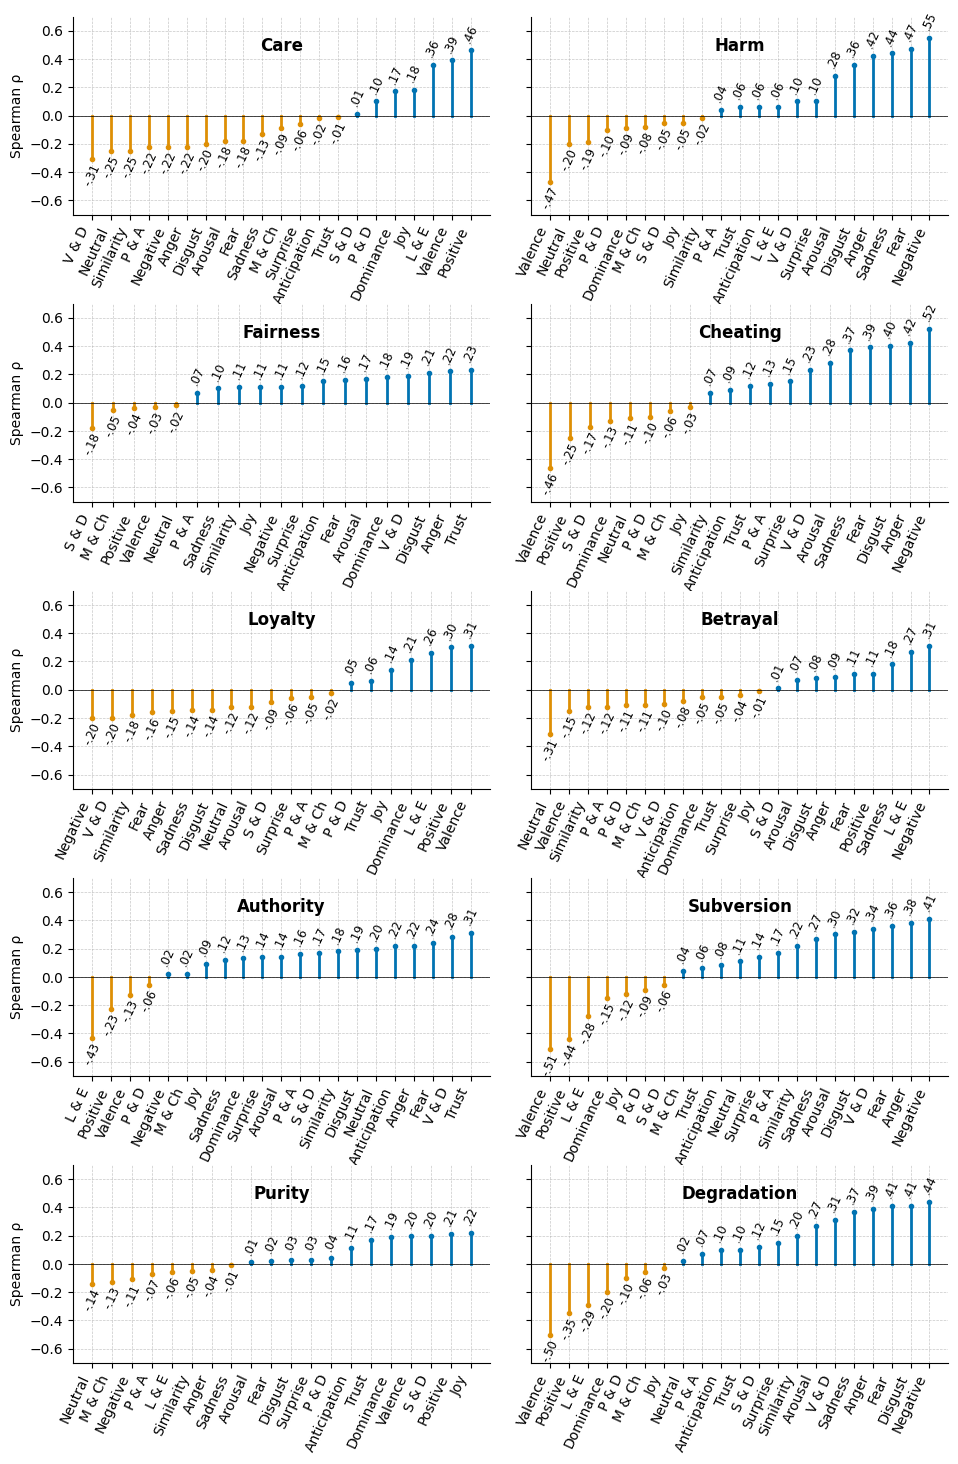

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'full_df' not in locals():
    print("Creating placeholder data for 'full_df'...")
    foundations = ["Care", "Harm", "Fairness", "Cheating", "Loyalty",
                   "Betrayal", "Authority", "Subversion", "Purity", "Degradation"]
    features = ["Positive", "Valence", "L & E", "Joy", "Dominance",
                "Arousal", "Negative", "Sadness", "Anger", "Fear",
                "Trust", "Anticipation", "Surprise", "Disgust", "P & D",
                "M & Ch", "S & D", "Betrayal", "P & A", "Neutral", "Similarity", "V & D"]
    data = []
    for f in foundations:
        np.random.shuffle(features) 
        for i, feat in enumerate(features[:15]): 
            rho = (np.random.rand() - 0.5) * 1.2
            data.append({
                "Moral Foundation": f,
                "Lyrics_Features": feat,
                "rho": rho,
                "pval": 0.0,
                "significance": "***"
            })
    full_df = pd.DataFrame(data)
    print("Placeholder data created.")

def create_clean_diverging_line_plot_swapped(data):
   
    foundations = data['Moral Foundation'].unique()
    n_foundations = len(foundations)
    
    fig, axes = plt.subplots(n_foundations // 2, 2, figsize=(10.3, 15.3), sharey=True) 
    axes = axes.flatten()

    positive_color = sns.color_palette("colorblind")[0]
    negative_color = sns.color_palette("colorblind")[1]

    for idx, foundation in enumerate(foundations):
        foundation_data = data[data['Moral Foundation'] == foundation].sort_values('rho')

        ax = axes[idx]
        for i, (topic, rho) in enumerate(zip(foundation_data['Lyrics_Features'], foundation_data['rho'])):
            color = positive_color if rho > 0 else negative_color
            
            # Plot vertically (X=i, Y=rho)
            ax.plot([i, i], [0, rho], color=color, linewidth=2, linestyle='-')
            ax.plot(i, rho, marker='o', color=color, markersize=3)

            # Format text to remove leading zero (e.g., ".50")
            score_text = f"{rho:.2f}"
            if rho > 0:
                score_text = score_text.replace("0.", ".")
            elif rho < 0:
                # Handle negative numbers by replacing "-0." with "-."
                score_text = score_text.replace("-0.", "-.")
            
            # Use original horizontal padding
            padding = 0.04 if rho > 0 else -0.02 
            
            ax.text(i, rho + padding, score_text, fontsize=8.5, color='black',
                    rotation=65,
                    va='bottom' if rho > 0 else 'top', 
                    ha='center')

        # Set X-axis labels (features)
        ax.set_xticks(range(len(foundation_data['Lyrics_Features'])))
        
        # Rotate 45 degrees and align right
        ax.set_xticklabels(foundation_data['Lyrics_Features'], 
                           fontsize=10, 
                           rotation=65,
                           ha='right') 

        # Set Y-axis (rho) limits and reference line
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        ax.set_ylim(-0.7, 0.7)
        
        # Reduced title font size
        # ax.set_title(foundation, fontsize=12, fontweight='bold')
        ax.text(0.5, 0.90, foundation, 
        transform=ax.transAxes, 
        fontsize=12, 
        fontweight='bold', 
        va='top', 
        ha='center')
        # ax.set_ylabel('Spearman ρ')
        if idx % 2 == 0:
            ax.set_ylabel('Spearman ρ')
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Use subplots_adjust for manual spacing
    plt.subplots_adjust(
        left=0.1,       
        right=0.95,     
        top=0.96,       
        bottom=0.08,    
        hspace=0.45,     
        wspace=0.1      
    )
    
    # Save the figure
    plt.savefig('SR_Corr_Tables/Lyrics_Features_MFT_Correlations_tight_layout.pdf', dpi=300, bbox_inches = 'tight')
    return fig

# Call the function to generate the plot
fig = create_clean_diverging_line_plot_swapped(full_df)
plt.show()